In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_json("../data/Appliances.json", lines = True)
df.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN
5,5,NaN,False,"05 11, 2014",A17K8WANMYHTX2,1118461304,{'Format:': ' Hardcover'},mark h wellman,I teach a class on innovation and I used the N...,Insightful & Very Useful!,1399766400,NaN
6,5,NaN,False,"05 9, 2014",A13IW3A6W43U0G,1118461304,{'Format:': ' Hardcover'},Mmf,I so appreciated the insights and perspective ...,The necessity of this book!,1399593600,NaN
7,5,NaN,True,"05 7, 2014",A1ECEGG1MP7J8J,1118461304,{'Format:': ' Hardcover'},G. Deatherage,"As with ""Surrounded by Genius"", Alan Gregerman...",Great insight-Great book,1399420800,NaN
8,5,NaN,False,"05 4, 2014",A2D5X9G9S3A7RN,1118461304,{'Format:': ' Hardcover'},Teresa Fritsch,Alan Gregermans book provides valuable ideas f...,The Necessity of Strangers dares you to be ope...,1399161600,NaN
9,5,NaN,False,"05 2, 2014",AP2F86JFRQ205,1118461304,{'Format:': ' Hardcover'},Ken Harris,I am a believer in Alan Gregerman. I have enj...,Review: The Necessity of Strangers,1398988800,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         602777 non-null  int64 
 1   vote            65262 non-null   object
 2   verified        602777 non-null  bool  
 3   reviewTime      602777 non-null  object
 4   reviewerID      602777 non-null  object
 5   asin            602777 non-null  object
 6   style           137973 non-null  object
 7   reviewerName    602762 non-null  object
 8   reviewText      602453 non-null  object
 9   summary         602649 non-null  object
 10  unixReviewTime  602777 non-null  int64 
 11  image           9258 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 51.2+ MB


In [4]:
df.isna().sum()

overall                0
vote              537515
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             464804
reviewerName          15
reviewText           324
summary              128
unixReviewTime         0
image             593519
dtype: int64

In [5]:
# Drop rows with missing values in 'vote'
df = df.dropna(subset = ['vote'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65262 entries, 0 to 602750
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         65262 non-null  int64 
 1   vote            65262 non-null  object
 2   verified        65262 non-null  bool  
 3   reviewTime      65262 non-null  object
 4   reviewerID      65262 non-null  object
 5   asin            65262 non-null  object
 6   style           16065 non-null  object
 7   reviewerName    65261 non-null  object
 8   reviewText      65235 non-null  object
 9   summary         65258 non-null  object
 10  unixReviewTime  65262 non-null  int64 
 11  image           5213 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.0+ MB


In [7]:
# Fill missing values in 'style,' 'reviewerName,' 'reviewText,' and 'summary' with empty strings
df['style'].fillna('', inplace = True)
df['reviewerName'].fillna('', inplace = True)
df['reviewText'].fillna('', inplace = True)
df['summary'].fillna('', inplace = True)

In [8]:
# Convert 'vote' to numeric (assuming 'NaN' means 0)
df['vote'] = df['vote'].str.replace(',', '', regex=True).fillna(0).astype(int)

# Convert reviewTime
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format = '%m %d, %Y')

In [9]:
# Extract year, month, and day from 'reviewTime'
df['reviewYear'] = df['reviewTime'].dt.year
df['reviewMonth'] = df['reviewTime'].dt.month
df['reviewDay'] = df['reviewTime'].dt.day

In [10]:
# Delete the 'image' column
df.drop('image', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65262 entries, 0 to 602750
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   overall         65262 non-null  int64         
 1   vote            65262 non-null  int32         
 2   verified        65262 non-null  bool          
 3   reviewTime      65262 non-null  datetime64[ns]
 4   reviewerID      65262 non-null  object        
 5   asin            65262 non-null  object        
 6   style           65262 non-null  object        
 7   reviewerName    65262 non-null  object        
 8   reviewText      65262 non-null  object        
 9   summary         65262 non-null  object        
 10  unixReviewTime  65262 non-null  int64         
 11  reviewYear      65262 non-null  int32         
 12  reviewMonth     65262 non-null  int32         
 13  reviewDay       65262 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(4), int64(2), object(

In [12]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,reviewYear,reviewMonth,reviewDay
0,5,2,False,2013-11-27,A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,2013,11,27
4,5,10,False,2013-09-07,A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,2013,9,7
10,4,2,True,2014-04-11,A3VF3A5A3O04E1,1118461304,{'Format:': ' Kindle Edition'},spsanders,A compelling book about why we should not be a...,Strangely Interesting,1397174400,2014,4,11
11,5,3,False,2014-03-20,A14DW5UMQ1M96O,1118461304,{'Format:': ' Hardcover'},Mike Jannini,Alan Gregerman's consulting work and writings ...,The Power of Innovation,1395273600,2014,3,20
19,5,2,True,2014-01-08,A2I5QME4S7CLFI,1118461304,{'Format:': ' Hardcover'},Laura F.,I usually find business books a re-hash of the...,A New Twist on Out-of-the Box Thinking,1389139200,2014,1,8


In [13]:
# Handling duplicates
# Convert the 'style' column from dictionaries to strings
df['style'] = df['style'].apply(lambda x: str(x) if isinstance(x, dict) else x)

# Check for duplicate rows
print("Duplicate Rows:")
print(df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Reset the index if needed
df = df.reset_index(drop=True)

df.head()

Duplicate Rows:
0         False
4         False
10        False
11        False
19        False
          ...  
602603    False
602611    False
602658    False
602748    False
602750    False
Length: 65262, dtype: bool
3640


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,reviewYear,reviewMonth,reviewDay
0,5,2,False,2013-11-27,A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,2013,11,27
1,5,10,False,2013-09-07,A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,2013,9,7
2,4,2,True,2014-04-11,A3VF3A5A3O04E1,1118461304,{'Format:': ' Kindle Edition'},spsanders,A compelling book about why we should not be a...,Strangely Interesting,1397174400,2014,4,11
3,5,3,False,2014-03-20,A14DW5UMQ1M96O,1118461304,{'Format:': ' Hardcover'},Mike Jannini,Alan Gregerman's consulting work and writings ...,The Power of Innovation,1395273600,2014,3,20
4,5,2,True,2014-01-08,A2I5QME4S7CLFI,1118461304,{'Format:': ' Hardcover'},Laura F.,I usually find business books a re-hash of the...,A New Twist on Out-of-the Box Thinking,1389139200,2014,1,8


In [14]:
df.info()
print("Duplicate Rows:")
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61622 entries, 0 to 61621
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   overall         61622 non-null  int64         
 1   vote            61622 non-null  int32         
 2   verified        61622 non-null  bool          
 3   reviewTime      61622 non-null  datetime64[ns]
 4   reviewerID      61622 non-null  object        
 5   asin            61622 non-null  object        
 6   style           61622 non-null  object        
 7   reviewerName    61622 non-null  object        
 8   reviewText      61622 non-null  object        
 9   summary         61622 non-null  object        
 10  unixReviewTime  61622 non-null  int64         
 11  reviewYear      61622 non-null  int32         
 12  reviewMonth     61622 non-null  int32         
 13  reviewDay       61622 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(4), int64(2), obj

In [15]:
# Printing unique values in style column
unique_styles = df['style'].unique()
print("Unique values in 'style' column:")
for style in unique_styles:
    print(style)

Unique values in 'style' column:
{'Format:': ' Hardcover'}
{'Format:': ' Kindle Edition'}
{'Size:': ' 6 ft', 'Style:': ' (Old)'}

{'Color:': ' 1 Pack'}
{'Style:': ' Dryer Vent'}
{'Size:': ' 6-Foot'}
{'Size Name:': ' 5-Foot'}
{'Style:': ' Extension Accessory'}
{'Size:': ' 1 Kit'}
{'Color:': ' Silver'}
{'Size:': ' 48-inch'}
{'Size:': ' 5-Foot'}
{'Size:': ' 60 Inch'}
{'Size:': ' 10-Foot'}
{'Style Name:': ' Black'}
{'Style Name:': ' Wine'}
{'Style Name:': ' Black Granite'}
{'Style Name:': ' Morning Rooster'}
{'Style Name:': ' Red'}
{'Style Name:': ' Fresh Brewed'}
{'Style Name:': ' Chickadees'}
{'Style Name:': ' Stainless Look'}
{'Style Name:': ' Night Shift'}
{'Style Name:': ' White'}
{'Style Name:': ' New Hope'}
{'Style Name:': ' Pink'}
{'Style Name:': ' Perfect Day'}
{'Style Name:': ' Rooster & Copper Kettle'}
{'Style Name:': ' Morning Run'}
{'Style Name:': ' Rooster'}
{'Style Name:': ' Almond'}
{'Style Name:': ' New Fruit'}
{'Color:': ' White'}
{'Size:': ' 25 Watts', 'Color:': ' Soft W

In [16]:
# Basic Data visualisation

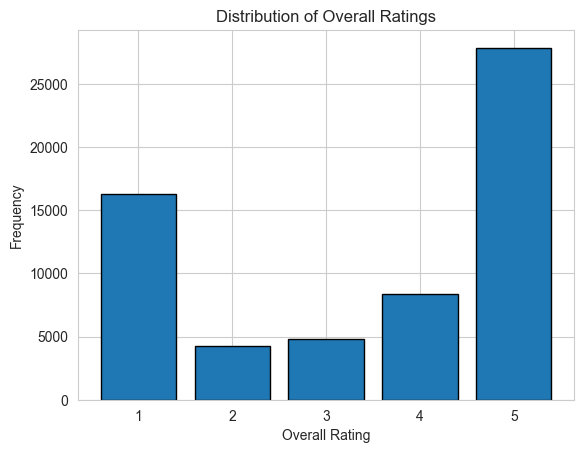

In [29]:
# Histogram for overall ratings
plt.hist(df['overall'], bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor = 'black', rwidth = 0.8)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.xticks(range(1, 6))
plt.savefig('../images/ReportImages/OverallRatingDistribution.jpg')
plt.show()

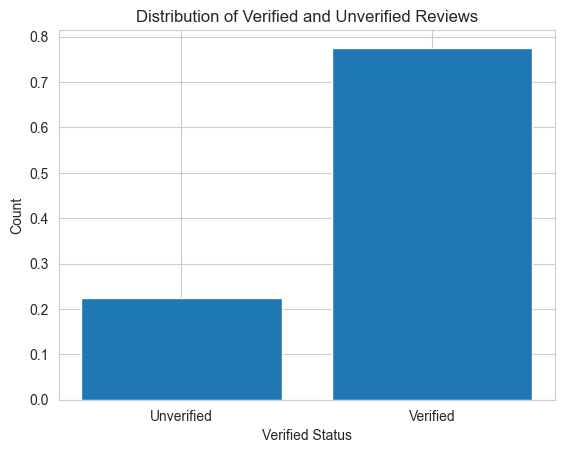

In [30]:
# Bar plot for verified status
verified_counts = df['verified'].value_counts(normalize=True)
plt.bar(verified_counts.index, verified_counts.values)
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.title('Distribution of Verified and Unverified Reviews')
plt.xticks([False, True], ['Unverified', 'Verified'])
plt.savefig('../images/ReportImages/VerificationDistribution.jpg')
plt.show()

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

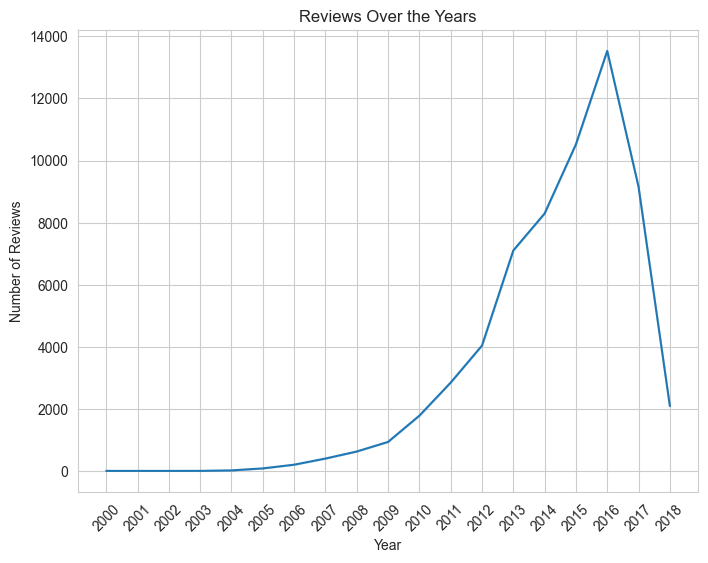

In [35]:
# Time Series Plot for Reviews Over the Years
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(x='reviewYear', y='overall', data=df, estimator=len)
plt.xticks(df['reviewYear'].unique(), rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Reviews Over the Years')
plt.savefig('../images/ReportImages/ReportsByYear.jpg')
plt.show()

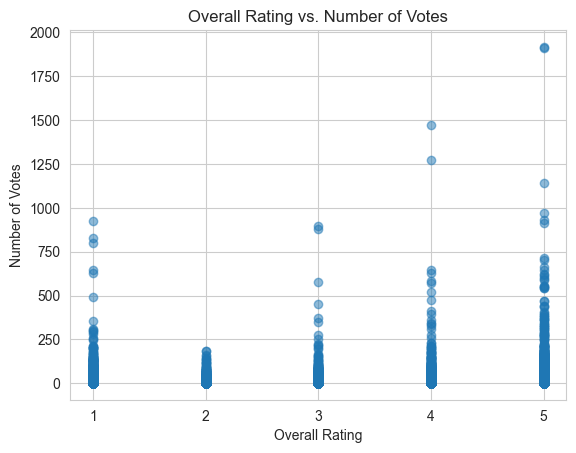

In [20]:
# Scatter Plot for overall ratings vs. vote
plt.scatter(df['overall'], df['vote'], alpha = 0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Number of Votes')
plt.title('Overall Rating vs. Number of Votes')
plt.xticks(range(1, 6))
plt.show()

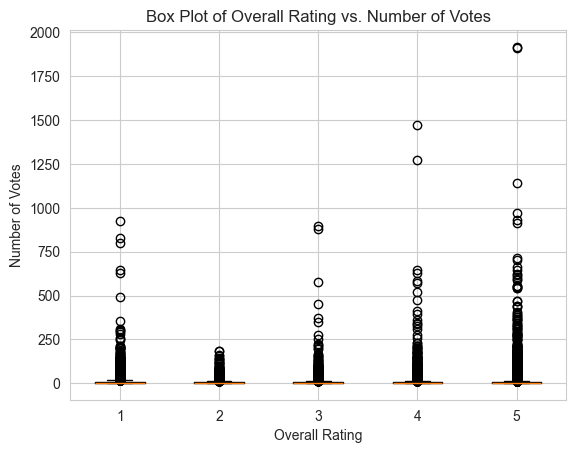

In [21]:
# Box plot for overall ratings vs. vote
plt.boxplot([df[df['overall'] == rating]['vote'] for rating in range(1, 6)], labels=range(1, 6))
plt.xlabel('Overall Rating')
plt.ylabel('Number of Votes')
plt.title('Box Plot of Overall Rating vs. Number of Votes')
plt.show()

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


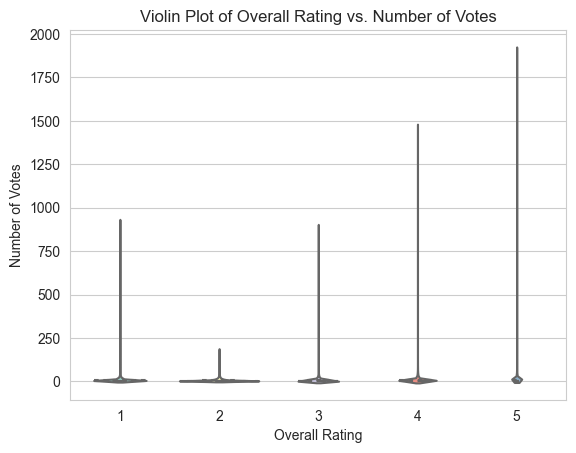

In [22]:
# Violin Plot for overall Ratings vs. vote
sns.violinplot(x = 'overall', y = 'vote', data = df, inner = 'quartile', palette = 'Set3')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Votes')
plt.title('Violin Plot of Overall Rating vs. Number of Votes')
plt.show()

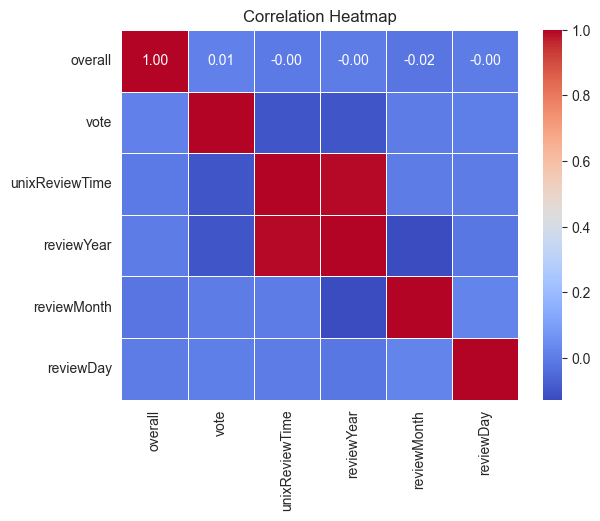

In [36]:
# Heatmap for Correlation
numerical_columns = ['overall', 'vote', 'unixReviewTime', 'reviewYear', 'reviewMonth', 'reviewDay']
correlation_matrix = df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.savefig('../images/ReportImages/CorrelationHeatmap.jpg')
plt.show()

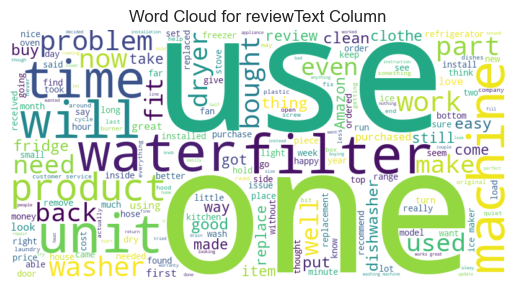

In [38]:
# Word cloud to visualize the most common words in reviewText

# Concatenate all reviewText entries into one text
review_text = ' '.join(df['reviewText'].astype(str))

# Create a WordCloud object
wordcloud_revText = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'viridis').generate(review_text)

# Display the word cloud
plt.imshow(wordcloud_revText, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for reviewText Column')
plt.savefig('../images/ReportImages/reviewTextWordCloud.jpg')
plt.show()

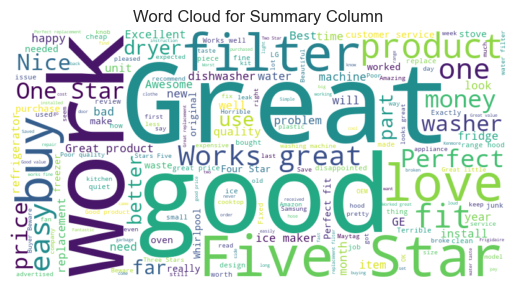

In [39]:
# Word cloud to visualize the most common words in summary

# Concatenate all reviewText entries into one text
summary_text = ' '.join(df['summary'].astype(str))

# Create a WordCloud object
wordcloud_sum = WordCloud(width = 800, height = 400, background_color = 'white', colormap = 'viridis').generate(summary_text)

# Display the word cloud
plt.imshow(wordcloud_sum, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.savefig('../images/ReportImages/summaryWordCloud.jpg')
plt.show()

In [26]:
df.to_csv('../data/appliances.csv', index=False)